Learning a function from a formula

In [11]:
import deepxde as dde
import numpy as np

In [12]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

In [13]:
geom = dde.geometry.Interval(-1, 1)

In [14]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

In [15]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [16]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.049688 s

'compile' took 0.176274 s



In [17]:
losshistory, train_state = model.train(iterations=5000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.97e-01]    [2.57e-01]    [1.11e+00]    
1000      [1.67e-04]    [1.77e-04]    [2.91e-02]    
2000      [6.48e-05]    [9.38e-05]    [2.12e-02]    
3000      [4.14e-05]    [7.27e-05]    [1.87e-02]    
4000      [2.09e-05]    [4.67e-05]    [1.50e-02]    
5000      [7.79e-06]    [2.75e-05]    [1.15e-02]    

Best model at step 5000:
  train loss: 7.79e-06
  test loss: 2.75e-05
  test metric: [1.15e-02]

'train' took 2.511449 s



Saving loss history to c:\Users\Dhwani Lab\OneDrive - IIT Kanpur\Recent study\ML1\Codes\VS Codes\PINN\loss.dat ...
Saving training data to c:\Users\Dhwani Lab\OneDrive - IIT Kanpur\Recent study\ML1\Codes\VS Codes\PINN\train.dat ...
Saving test data to c:\Users\Dhwani Lab\OneDrive - IIT Kanpur\Recent study\ML1\Codes\VS Codes\PINN\test.dat ...


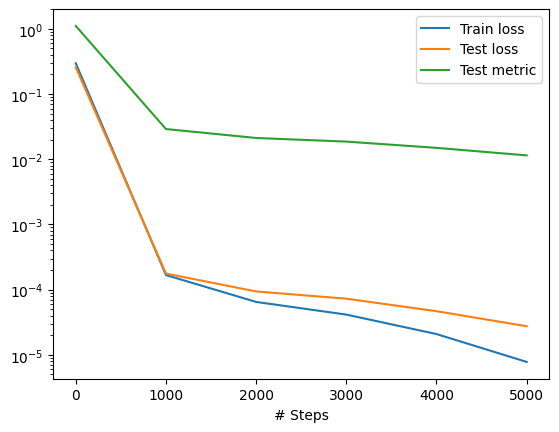

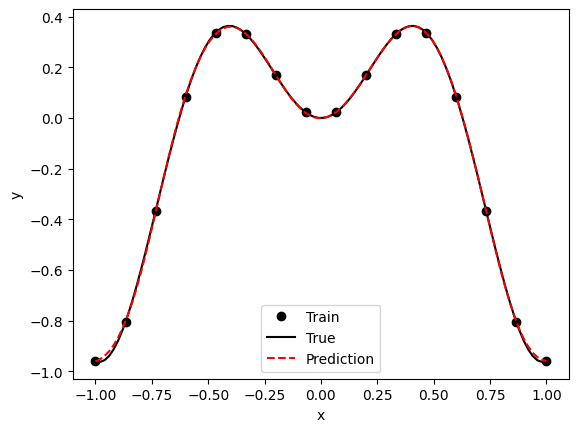

In [18]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)